In [1]:
# Load libraries
### vector data
import geopandas as gpd
import pandas as pd

### raster data
import rioxarray as rxr
import xarray as xr

### maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

### open street map
from osmnx import features as osm
import osmnx as ox

### file structure
import os
import pathlib

### earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [2]:
### set up project and folder for data
project = earthpy.Project("Konza Prarie Vegetation", dirname = 'Konza_ndvi')

In [5]:
# get polygon for area of interest
### search for PRNS
Konza_gdf = ox.geocode_to_gdf(
    'Konza Prairie Biological Station')

### check it out
Konza_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-96.61513 39.11099, -96.6151 39.1104...",-96.615135,39.065472,-96.538652,39.135937,304377049,way,104952723,39.100201,-96.576798,boundary,protected_area,25,0.066695,protected_area,Konza Prairie Biological Station,"Konza Prairie Biological Station, Riley County..."


<Axes: >

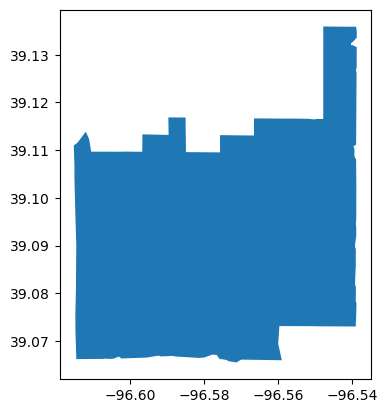

In [6]:
### make a quick plot
Konza_gdf.plot()

In [7]:
# Get NDVI for area of interest
### initialize AppeearsDownloader for MODIS NDVI data
### set parameters
ndvi_downloader = eaapp.AppeearsDownloader(

    ### give your download a name
    download_key = "Konza_ndvi",

    ### tell it to put the data in your project that you already defined
    project = project,

    ### specify the MODIS product you want
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    ### choose a start date and end date
    start_date = "06-01",
    end_date = "07-30",

    ### recurring means you want those dates over multiple years
    recurring = True,

    ### specify the range of years you want
    year_range = [2004, 2011],

    ### specify the polygon you want to get NDVI data for
    polygon = Konza_gdf
)

In [8]:
ndvi_downloader

In [ ]:
### download the prepared download -- this can take a while!
ndvi_downloader.download_files(cache=True)